## TCR Analysis from Chylek et al. 2014

In [1]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar.plot import DotPlot

import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Supplements/SupplementaryData/Control_Experiments/TCR_Chylek_2014/'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/TCR_Y_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/TCR_Y_mann_whitney_fpr.tsv', sep='\t', index_col=0)

#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

/anaconda3/envs/py37-kstar/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/py37-kstar/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


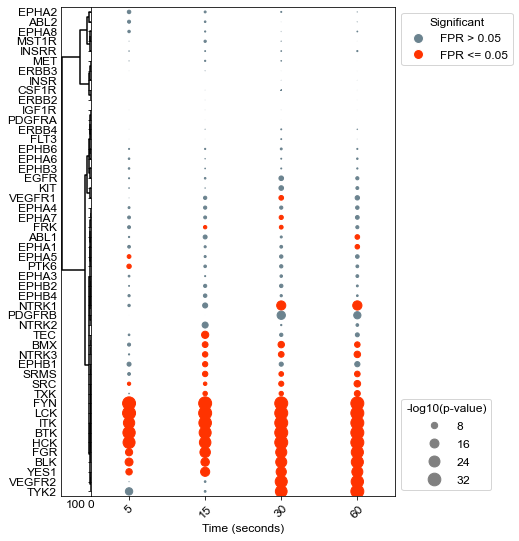

In [2]:
results = activities
results = -np.log10(results)


#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (6, 9), 
        nrows = 1, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (6,9), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)', 
                       x_label_dict={'data:time(sec):5':'5','data:time(sec):15':'15', 'data:time(sec):30':'30', 'data:time(sec):60':'60' },
                      kinase_dict=kinase_dict)
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.

dots.cluster(orientation = 'left', ax = axes[0], method='ward')

dots.dotplot(ax = axes[1])
plt.xlabel('Time (seconds)', FontSize=12)
plt.xticks(rotation = 45, FontSize=12)
plt.yticks(FontSize=12)
plt.savefig(odir+'TCR_all.pdf', bbox_inches='tight')

/anaconda3/envs/py37-kstar/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/py37-kstar/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


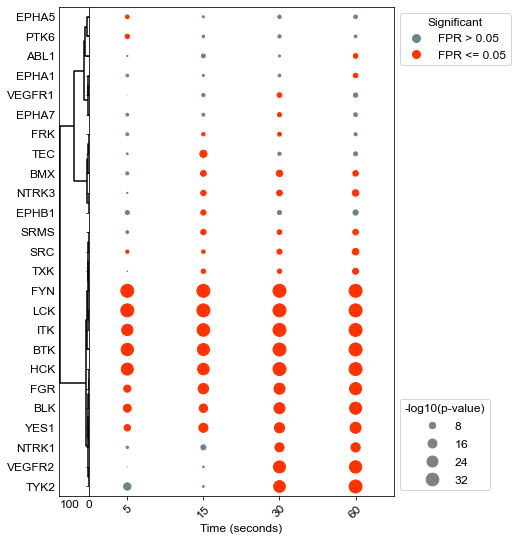

In [3]:
results = activities
results = -np.log10(results)


#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (6, 9), 
        nrows = 1, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (6,9), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)', 
                       x_label_dict={'data:time(sec):5':'5','data:time(sec):15':'15', 'data:time(sec):30':'30', 'data:time(sec):60':'60' },
                      kinase_dict=kinase_dict)
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.drop_kinases_with_no_significance()
dots.cluster(orientation = 'left', ax = axes[0], method='ward')

dots.dotplot(ax = axes[1])
plt.xlabel('Time (seconds)', FontSize=12)
plt.xticks(rotation = 45, FontSize=12)
plt.yticks(FontSize=12)
plt.savefig(odir+'TCR_sigKinases.pdf', bbox_inches='tight')